## Векторы

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

#### Введение

Создадим список из двух чисел

In [2]:
numbers1 = [2, 3] # Список Python
print(numbers1) 

[2, 3]


Преобразуем список в вектор

In [3]:
vector1 = np.array(numbers1) # Массив NumPy
print(vector1) 

[2 3]


Создадим другой вектор без промежуточной переменной:

In [4]:
vector2 = np.array([6, 2])
print(vector2) 

[6 2]


Преобразуем этот вектор в список:

In [5]:
numbers2 = list(vector2) # Список из вектора
print(numbers2) 

[np.int64(6), np.int64(2)]


Столбец структуры DataFrame в pandas преобразуется в вектор NumPy атрибутом values:

In [6]:
data = pd.DataFrame([1, 7, 3], columns=['numbers'])
display(data)
print(data['numbers'].values) 

,numbers
0,1
1,7
2,3


[1 7 3]


Oпределим размер вектора, то есть количество элементов в нём

In [7]:
print(len(vector2)) 

2


Визуализируем векторы, чтобы изучить списки чисел на координатной плоскости.

Документация по визуализации векторов https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html

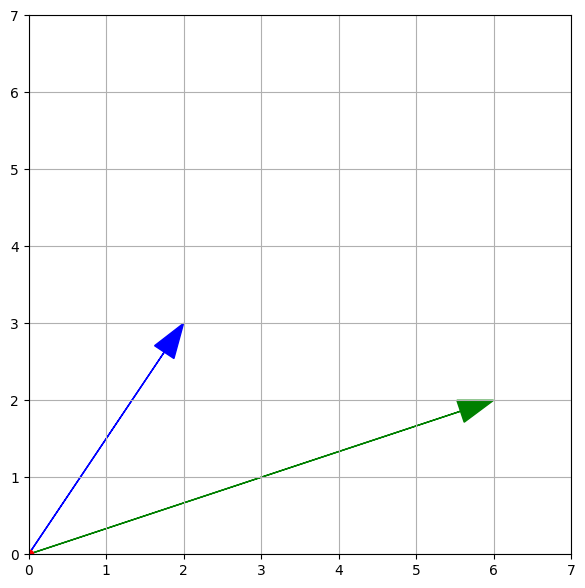

In [8]:
plt.figure(figsize=(7, 7))
plt.axis([0, 7, 0, 7])
plt.arrow(0, 0, vector1[0], vector1[1], head_width=0.3,
          length_includes_head="True", color='b')
plt.arrow(0, 0, vector2[0], vector2[1], head_width=0.3,
          length_includes_head="True", color='g')
plt.plot(0, 0, 'ro') # толстая красная точка в начале координат
plt.grid(True)
plt.show() 

#### Сложение и вычитание

К вектору vector1 прибавим vector2

In [9]:
sum_of_vectors = vector1 + vector2
print(sum_of_vectors) 

[8 5]


Из вектора vector2 вычтем vector1:


In [10]:
subtraction = vector2 - vector1
print(subtraction) 

[ 4 -1]


Изобразим эти векторы стрелками на плоскости

#### Умножение на число

Умножим вектор vector1 на положительное число:

In [11]:
vector3 = 2 * vector1
print(vector3) 

[4 6]


А теперь умножим на отрицательное:

In [12]:
vector4 = -1 * vector1
print(vector4) 

[-2 -3]


При умножении на положительное число векторы на плоскости сохраняют направление, но стрелки становятся длиннее или короче. При умножении на отрицательное  —  направление меняется на противоположное.

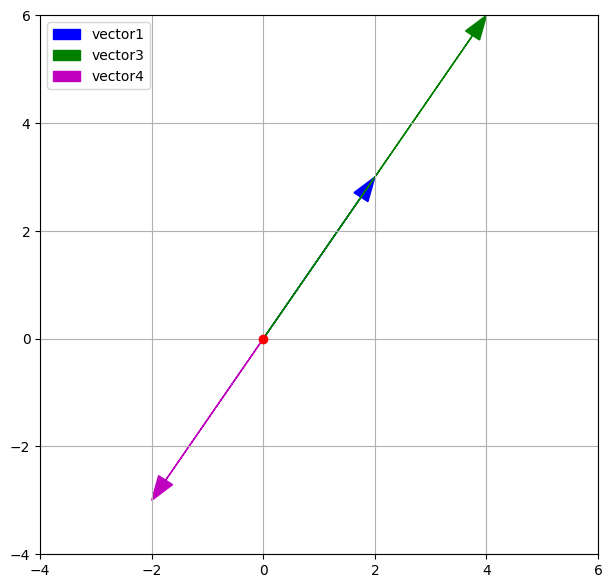

In [13]:
plt.figure(figsize=(7.2, 7))
plt.axis([-4, 6, -4, 6])
arrow1 = plt.arrow(0, 0, vector1[0], vector1[1],
               head_width=0.3, length_includes_head="True", color='b')
arrow3 = plt.arrow(0, 0, vector3[0], vector3[1],
               head_width=0.3, length_includes_head="True", color='g')
arrow4 = plt.arrow(0, 0, vector4[0], vector4[1],
               head_width=0.3, length_includes_head="True", color='m')
plt.plot(0, 0, 'ro')
plt.legend([arrow1, arrow3, arrow4], ['vector1', 'vector3', 'vector4'], loc='upper left')
plt.grid(True)
plt.show() 

#### Среднее векторов

Получим среднее для векторов vector1 и vector2

In [14]:
vector_mean = .5*(vector1+vector2)
print(vector_mean) 

[4.  2.5]


Среднее значение мы назвали vector_mean. Первая координата нового вектора — это среднее значение первых координат векторов vector1 и vector2, а вторая — среднее вторых координат.

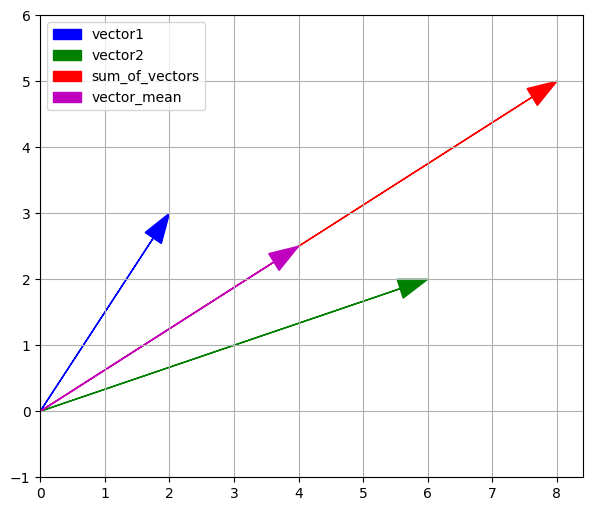

In [15]:
plt.figure(figsize=(7, 6))
plt.axis([0, 8.4, -1, 6])
arrow1 = plt.arrow(0, 0, vector1[0], vector1[1],
                   head_width=0.3, length_includes_head="True", color='b')
arrow2 = plt.arrow(0, 0, vector2[0], vector2[1],
                   head_width=0.3, length_includes_head="True", color='g')
arrow_sum = plt.arrow(0, 0, sum_of_vectors[0], sum_of_vectors[1],
                   head_width=0.3, length_includes_head="True", color='r')
arrow_mean = plt.arrow(0, 0, vector_mean[0], vector_mean[1],
                   head_width=0.3, length_includes_head="True", color='m')
plt.legend([arrow1, arrow2, arrow_sum, arrow_mean], ['vector1', 'vector2', 'sum_of_vectors', 'vector_mean'], loc='upper left')
plt.grid(True)
plt.show() 

#### Векторизованные функции

_Поэлементное перемножение и деление_  
Применив функцию np.array, после умножения и деления двух массивов одного размера получим новый вектор такого же размера

In [16]:
array1 = np.array([2, -4, 6, -8])
array2 = np.array([1, 2, 3, 4])
array_mult = array1 * array2
array_div = array1 / array2
print("Произведение двух массивов: ", array_mult)
print("Частное двух массивов: ", array_div) 

Произведение двух массивов:  [  2  -8  18 -32]
Частное двух массивов:  [ 2. -2.  2. -2.]


_Операции с массивом и числом_  
Если арифметические операции производятся над массивом и отдельным числом, то действие применяется к каждому элементу массива. И снова образуется массив такого же размера. 

In [17]:
array2_plus_10 = array2 + 10
array2_minus_10 = array2 - 10
array2_div_10 = array2 / 10
print("Сумма: ", array2_plus_10) 
print("Разность: ", array2_minus_10)
print("Частное массива и числа: ", array2_div_10) 

Сумма:  [11 12 13 14]
Разность:  [-9 -8 -7 -6]
Частное массива и числа:  [0.1 0.2 0.3 0.4]


_Поэлементные функции_  
К массиву также поэлементно применимы и стандартные математические функции, например, возведение в степень или логарифмы. 

In [18]:
numbers_from_0 =  np.array([0, 1, 2, 3, 4])
squares = numbers_from_0**2
print(squares) 

[ 0  1  4  9 16]


#### Векторизация метрик

В переменной target сохраним набор фактических значений, а в predictions — предсказанных. Оба набора типа np.array.

In [19]:
target = np.array([0.9, 1.2, 1.4, 1.5, 1.9, 2.0])
predictions = np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0]) 

Рассчитаем MSE

In [20]:
((target - predictions) ** 2).mean()

np.float64(0.0049999999999999975)

In [21]:
mean_squared_error(predictions, target)

0.0049999999999999975

#### Скалярное произведение 

Вычислим скалярное произведение двух векторов по определению

In [22]:
price = np.array([89, 35, 159])
amount = np.array([2, 3, 1])

print((price * amount).sum())

442


Вычислим это же скалярное произведение функцией numpy.dot() и убедимся, что результаты совпадают

In [23]:
print(np.dot(price, amount))

442


Ещё проще скалярное произведение вычисляется оператором матричного умножения. Он обозначается символом коммерческое эт, или «собака» (@)

In [24]:
print(price @ amount)

442


#### Расстояния на плоскости

C помощью скалярного произведения научимся рассчитывать расстояние между векторами.

In [25]:
((vector2 - vector1) @ (vector2 - vector1)) ** (1/2)

np.float64(4.123105625617661)

Для расчёта расстояний в SciPy есть библиотека distance. А евклидово расстояние можно вычислить с помощью функции distance.euclidean()

In [26]:
distance.euclidean(vector1, vector2)

np.float64(4.123105625617661)

## Матрицы

Создадим в NumPy матрицу из списка списков, для этого вызовем np.array(). Все вложенные  списки одинаковой длины.

In [27]:
matrix = np.array([
    [1, 2, 3], 
    [4, 5, 6],
    [7, 8, 9]])
print(matrix) 

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Вместо списка списков возьмём список векторов

In [28]:
string0 = np.array([1,2,3])
string1 = np.array([-1,-2,-3])
list_of_vectors = [string0, string1]
matrix_from_vectors = np.array(list_of_vectors)

print(matrix_from_vectors) 

[[ 1  2  3]
 [-1 -2 -3]]


Создадим матрицу из таблицы Pandas: её атрибут values — это матрица.

In [29]:
df = pd.DataFrame({'a': [ 120,  60, 75], 'b': [42, 50, 90]})
matrix = df.values
display(df)
print(matrix) 

,a,b
0,120,42
1,60,50
2,75,90


[[120  42]
 [ 60  50]
 [ 75  90]]


Атрибутом shape определим размер матрицы 𝐴. Её cтроки и столбцы нумеруются с нуля, как и индексы массива.

In [30]:
A = np.array([
    [1, 2, 3], 
    [2, 3, 4]])

print('Размер:', A.shape)
print('A[1, 2]:', A[1, 2]) 

Размер: (2, 3)
A[1, 2]: 4


Из матрицы выделим отдельные строки и столбцы

In [31]:
matrix = np.array([
    [1, 2, 3], 
    [4, 5, 6],
    [7, 8, 9],
    [10,11,12]])

print('Строка 0:', matrix[0, :])
print('Столбец 2:', matrix[:, 2]) 

Строка 0: [1 2 3]
Столбец 2: [ 3  6  9 12]


Получили векторы.

#### Операции с матрицами

Просуммируем матрицы

In [32]:
matrix1 = np.array([
    [1, 2], 
    [3, 4]])

matrix2 = np.array([
    [5, 6], 
    [7, 8]])

print(matrix1 + matrix2) 

[[ 6  8]
 [10 12]]


Умножим матрицу на 2 и вычтем из неё 2

In [33]:
matrix = np.array([
    [1, 2], 
    [3, 4]])

print(matrix * 2)
print(matrix - 2) 

[[2 4]
 [6 8]]
[[-1  0]
 [ 1  2]]


Выполним эту операцию умножения матрицы на вектор, вызовем знакомую вам функцию np.dot()

In [34]:
A = np.array([
    [1, 2, 3], 
    [4, 5, 6]])

b = np.array([7, 8, 9])

print(np.dot(A, b))
print(A.dot(b)) 

[ 50 122]
[ 50 122]


Транспонируем матрицу. В NumPy эта операция задаётся атрибутом T. 

In [35]:
matrix = np.array([
    [1, 2], 
    [4, -4], 
    [0, 17]])

print("Исходная матрица")
print(matrix)
print("Транспонированная матрица")
print(matrix.T) 

Исходная матрица
[[ 1  2]
 [ 4 -4]
 [ 0 17]]
Транспонированная матрица
[[ 1  4  0]
 [ 2 -4 17]]


Перемножим две матрицы. В numpy матрицы умножаются вызовом функций np.dot(A, B), или A.dot(B). Также этот вызов можно заменить знаком матричного умножения @.

In [36]:
A = np.array([
    [1, 2, 3], 
    [-1, -2, -3]])

B = np.array([
    [1, 0], 
    [0, 1],
    [1, 1]])

print(A.dot(B))
print()
print(np.dot(A,B)) 
print()
print(A @ B) 

[[ 4  5]
 [-4 -5]]

[[ 4  5]
 [-4 -5]]

[[ 4  5]
 [-4 -5]]


Перемножим матрицы A и B в другом порядке

In [37]:
print(B @ A) 

[[ 1  2  3]
 [-1 -2 -3]
 [ 0  0  0]]


Научимся создавать обратную матрицу и убедимся, что она действительно обратная.

In [38]:
matrix = np.array([
    [1, 2], 
    [3, 4]])
matrix_inv = np.linalg.inv(matrix)
print(matrix)
print()
print(matrix @ matrix_inv)

[[1 2]
 [3 4]]

[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


## Градиентный спуск

Напишем алгоритм градиентного спуска на языке Python.
Резюмируем, что нужно сделать для запуска алгоритма градиентного спуска:
 - В аргументах алгоритма задать начальное значение x⁰.
 - Рассчитать градиент функции потерь (это вектор производных по каждому аргументу, в который нужно передать вектор x).
 - Найти новое значение по формуле: $x^{1}$ = $x^{0}$ - μ ∇f($x^{0}$), где μ — размер шага; задаётся в аргументах алгоритма.
 - Повторить заданное в аргументах число итераций.

Реализуем нахождение минимума для функции f($x_{1}$, $x_{2}$) = $(x_{1} + x_{2} - 1)^{2}$ + $(x_{1} - x_{2} - 2)^{2}$.

Рассчитаем ее реальный минимум:  
∇f = (4$x_{1}$ - 6, 4$x_{2}$ + 2) = (0, 0)  
$x_{1}$ = 1.5  
$x_{2}$ = -0.5

In [39]:
def func(x):
    return (x[0] + x[1] - 1)**2 + (x[0] - x[1] - 2)**2

def gradient(x):
    return np.array([4 * x[0] - 6, 4 * x[1] + 2])

def gradient_descent(initialization, step_size, iterations):
    old_x = initialization
    for i in range(iterations):
        new_x = old_x - step_size * gradient(old_x)
        old_x = new_x
    return old_x

print(gradient_descent(np.array([0, 0]), 0.05, 100))

[ 1.5 -0.5]


## Градиентный спуск для линейной регрессии

Напишем алгоритм градиентного спуска для линейной регрессии.  
Будем решать задачу регрессии из задачи темы 1. Для начала найдем решение с помощью библиотечного алгоритма.

In [40]:
df = load_diabetes(as_frame=True).frame

features_train, features_test, target_train, target_test = train_test_split(df.drop(['target'], axis=1), df['target'], test_size=0.3, random_state=2)

lin_model = LinearRegression()

lin_model.fit(features_train, target_train)

lin_mae_train = mean_absolute_error(lin_model.predict(features_train), target_train)
print("MAE библиотечной модели на обучающем датасете", lin_mae_train)
lin_mae_val = mean_absolute_error(lin_model.predict(features_test), target_test)
print("MAE библиотечной модели на валидационном датасете", lin_mae_val)

MAE библиотечной модели на обучающем датасете 43.04580498936244
MAE библиотечной модели на валидационном датасете 44.19931587691498


Теперь реализуем свой класс для решения задачи градиентным спуском

In [41]:
class MyLinearRegression:
    def __init__(self, step_size, iterations):
        self.step_size = step_size
        self.iterations = iterations
    
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)        
        y = train_target
        w = np.zeros(X.shape[1])
        
        for i in range(self.iterations):
            gradient = 2* X.T @ (X @ w - y) / X.shape[0]
            w -= self.step_size * gradient

        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Подберем различные размеры шагов и количества итераций градиентного спуска, чтобы добиться приемлимого результата.

In [42]:
our_lin_model = MyLinearRegression(0.9, 1000)
our_lin_model.fit(features_train, target_train)

our_lin_mae_train = mean_absolute_error(our_lin_model.predict(features_train), target_train)
print("MAE нашей модели на обучающем датасете", our_lin_mae_train)
our_lin_mae_val = mean_absolute_error(our_lin_model.predict(features_test), target_test)
print("MAE нашей модели на валидационном датасете", our_lin_mae_val)

MAE нашей модели на обучающем датасете 43.21241185937767
MAE нашей модели на валидационном датасете 44.4320817450386


Сравним качество с решением прямым методом

In [43]:
X = np.concatenate((np.ones((features_train.shape[0], 1)), features_train), axis=1)        
y = target_train

w = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(y)

straight_mae_train = mean_absolute_error(X @ w, target_train)
print("MAE прямого на решения обучающем датасете", straight_mae_train)

X_test = np.concatenate((np.ones((features_test.shape[0], 1)), features_test), axis=1)
straight_mae_test = mean_absolute_error(X_test @ w, target_test)
print("MAE прямого на решения тестовом датасете", straight_mae_test)

MAE прямого на решения обучающем датасете 43.04580498936244
MAE прямого на решения тестовом датасете 44.19931587691499
